# Применяем нейронную сеть для распознавания изображений моделей одежды

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование нейросетей на Python](https://www.asozykin.ru/courses/nnpython)".

In [ ]:
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

## Загружаем предварительно обученную нейронную сеть

Закачиваем файл с обученной моделью

In [ ]:
!wget https://github.com/sozykin/dlpython_course/raw/master/introduction/fashion_mnist_dense.h5 -O fashion_mnist_dense.h5

--2019-08-11 04:05:31--  https://github.com/sozykin/dlpython_course/raw/master/introduction/fashion_mnist_dense.h5
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sozykin/dlpython_course/master/introduction/fashion_mnist_dense.h5 [following]
--2019-08-11 04:05:32--  https://raw.githubusercontent.com/sozykin/dlpython_course/master/introduction/fashion_mnist_dense.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7657992 (7.3M) [application/octet-stream]
Saving to: ‘fashion_mnist_dense.h5’

fashion_mnist_dense 100%[===================>]   7.30M  --.-KB/s    in 0.07s   

2019-08-11 04:05:32 (101 MB

Загружаем модель в память

In [ ]:
model = load_model('fashion_mnist_dense.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


## Загружаем в Colab изображение для распознавания

In [ ]:
f = files.upload()

Saving bag.jpg to bag.jpg


In [ ]:
!ls

fashion_mnist_dense.h5	sample_data  tshirt.jpg


In [ ]:
img_path = 'bag.jpg'

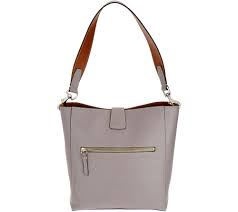

In [ ]:
Image(img_path, width=150, height=150)

## Распознаем изображение

Загружаем изображение из файла с помощью инструментов Keras

In [ ]:
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Предварительная обработка изображения

In [ ]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [ ]:
prediction = model.predict(x)

Результаты распознавания

In [ ]:
prediction

array([[1.0048650e-09, 1.2857140e-18, 4.3934003e-09, 4.0759669e-06,
        1.1158774e-09, 6.8090867e-12, 4.2181747e-09, 2.5657423e-10,
        9.9999595e-01, 1.8443560e-20]], dtype=float32)

In [ ]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 8
Название класса: сумка
